# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
weather_api_key = "IMPORT API KEY... I had to purchase it for it to work"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [27]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    city_url = url + '&q=' + city 

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | komsomolskiy
Processing Record 2 of Set 1 | olafsvik
Processing Record 3 of Set 1 | brookhaven
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | batagay
Processing Record 6 of Set 1 | baiyin
Processing Record 7 of Set 1 | turbat
Processing Record 8 of Set 1 | brejo santo
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | bom jardim
Processing Record 11 of Set 1 | souillac
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | matagami
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | vestmannaeyjar
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | dongsheng
Processing Record 23 of Se

City not found. Skipping...
Processing Record 41 of Set 4 | ayr
Processing Record 42 of Set 4 | faya
Processing Record 43 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 44 of Set 4 | mananjary
Processing Record 45 of Set 4 | sao jose dos pinhais
Processing Record 46 of Set 4 | yumen
Processing Record 47 of Set 4 | batemans bay
Processing Record 48 of Set 4 | tandil
Processing Record 49 of Set 4 | tay ninh
Processing Record 0 of Set 5 | mount gambier
Processing Record 1 of Set 5 | bredasdorp
Processing Record 2 of Set 5 | poum
Processing Record 3 of Set 5 | san jeronimo
Processing Record 4 of Set 5 | santa helena de goias
Processing Record 5 of Set 5 | lalmohan
Processing Record 6 of Set 5 | pengcheng
Processing Record 7 of Set 5 | ituni
City not found. Skipping...
Processing Record 8 of Set 5 | mutare
Processing Record 9 of Set 5 | palmer
Processing Record 10 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 11 of Set 5 | katsuura
Processing Record 12 

Processing Record 30 of Set 8 | sinnamary
Processing Record 31 of Set 8 | buala
Processing Record 32 of Set 8 | dutlwe
Processing Record 33 of Set 8 | marcona
City not found. Skipping...
Processing Record 34 of Set 8 | hohhot
Processing Record 35 of Set 8 | ocala
Processing Record 36 of Set 8 | richards bay
Processing Record 37 of Set 8 | lodja
Processing Record 38 of Set 8 | noyabrsk
Processing Record 39 of Set 8 | acarau
Processing Record 40 of Set 8 | neiafu
Processing Record 41 of Set 8 | narok
Processing Record 42 of Set 8 | marsabit
Processing Record 43 of Set 8 | portsmouth
Processing Record 44 of Set 8 | tinqueux
Processing Record 45 of Set 8 | port hedland
Processing Record 46 of Set 8 | abadiania
Processing Record 47 of Set 8 | hambantota
Processing Record 48 of Set 8 | qasigiannguit
Processing Record 49 of Set 8 | punta alta
Processing Record 0 of Set 9 | kaitangata
Processing Record 1 of Set 9 | sungai siput utara
City not found. Skipping...
Processing Record 2 of Set 9 | g

Processing Record 19 of Set 12 | sangar
Processing Record 20 of Set 12 | rincon
Processing Record 21 of Set 12 | bardiyah
Processing Record 22 of Set 12 | porto santo
Processing Record 23 of Set 12 | constitucion
Processing Record 24 of Set 12 | bilibino
Processing Record 25 of Set 12 | san vicente
Processing Record 26 of Set 12 | pacifica
Processing Record 27 of Set 12 | dubbo
Processing Record 28 of Set 12 | tubuala
Processing Record 29 of Set 12 | mirnyy
Processing Record 30 of Set 12 | zyryanka
Processing Record 31 of Set 12 | aklavik
Processing Record 32 of Set 12 | warri
Processing Record 33 of Set 12 | basco
Processing Record 34 of Set 12 | freeport
Processing Record 35 of Set 12 | luena
Processing Record 36 of Set 12 | kemijarvi
Processing Record 37 of Set 12 | santa maria
Processing Record 38 of Set 12 | mrirt
City not found. Skipping...
Processing Record 39 of Set 12 | tukrah
Processing Record 40 of Set 12 | mosquera
Processing Record 41 of Set 12 | gimli
Processing Record 42

In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,komsomolskiy,40.4272,71.7189,54.32,71,75,4.61,UZ,1680749353
1,olafsvik,64.8945,-23.7142,38.75,80,100,7.34,IS,1680749372
2,brookhaven,31.5791,-90.4407,73.80,87,100,6.49,US,1680749351
3,cape town,-33.9258,18.4232,71.11,73,0,3.44,ZA,1680749186
4,batagay,67.6333,134.6333,2.26,83,99,4.21,RU,1680749378
...,...,...,...,...,...,...,...,...,...
554,north myrtle beach,33.8160,-78.6800,71.69,96,0,9.22,US,1680749429
555,sennoy,52.1509,46.9631,50.41,68,72,5.30,RU,1680749429
556,southbridge,42.0751,-72.0334,41.36,97,100,3.00,US,1680749429
557,dzaoudzi,-12.7887,45.2699,75.09,94,0,5.75,YT,1680749430


In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,komsomolskiy,40.4272,71.7189,54.32,71,75,4.61,UZ,1680749353
1,olafsvik,64.8945,-23.7142,38.75,80,100,7.34,IS,1680749372
2,brookhaven,31.5791,-90.4407,73.80,87,100,6.49,US,1680749351
3,cape town,-33.9258,18.4232,71.11,73,0,3.44,ZA,1680749186
4,batagay,67.6333,134.6333,2.26,83,99,4.21,RU,1680749378


In [32]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [33]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,komsomolskiy,40.4272,71.7189,54.32,71,75,4.61,UZ,1680749353
1,olafsvik,64.8945,-23.7142,38.75,80,100,7.34,IS,1680749372
2,brookhaven,31.5791,-90.4407,73.80,87,100,6.49,US,1680749351
3,cape town,-33.9258,18.4232,71.11,73,0,3.44,ZA,1680749186
4,batagay,67.6333,134.6333,2.26,83,99,4.21,RU,1680749378


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

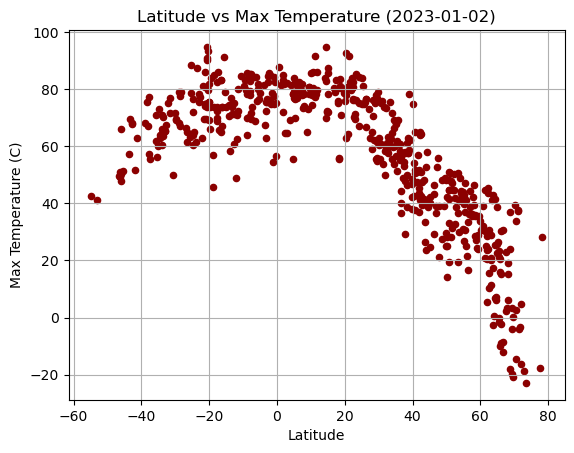

In [34]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat', y='Max Temp', c= 'DarkRed')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Latitude vs Max Temperature (2023-01-02)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

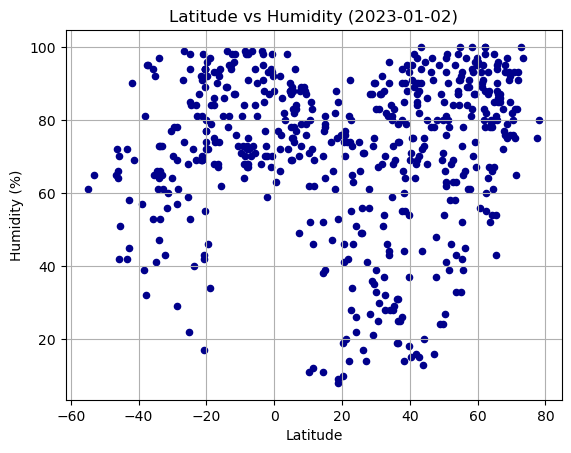

In [35]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat', y='Humidity', c= 'DarkBlue')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs Humidity (2023-01-02)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

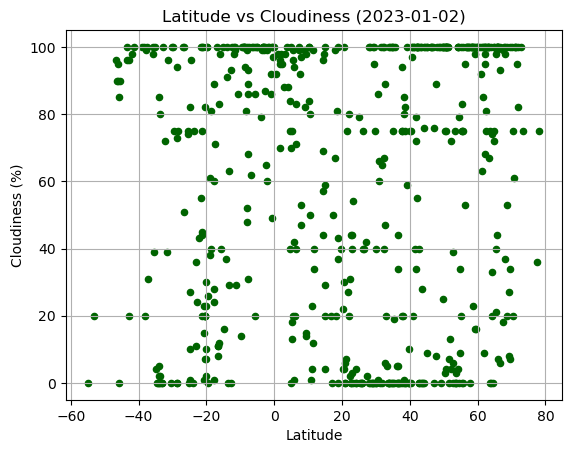

In [36]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat', y='Cloudiness', c= 'DarkGreen')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs Cloudiness (2023-01-02)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

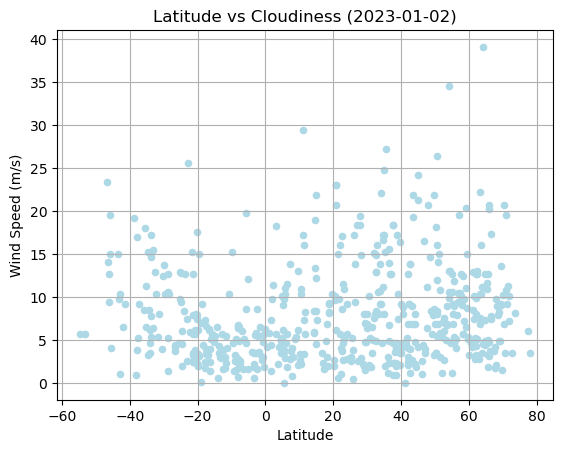

In [37]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat', y='Wind Speed', c= 'LightBlue')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Latitude vs Cloudiness (2023-01-02)')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def lin_regression(hemi,x,y,a,b):
    x_value = hemi[x]
    y_value = hemi[y]
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_value,y_value)
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    plt.plot(x_value,regress_values,"r-")
    print(f"The r-value is: {rvalue**2}")
    print(line_eq)
        

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,komsomolskiy,40.4272,71.7189,54.32,71,75,4.61,UZ,1680749353
1,olafsvik,64.8945,-23.7142,38.75,80,100,7.34,IS,1680749372
2,brookhaven,31.5791,-90.4407,73.80,87,100,6.49,US,1680749351
4,batagay,67.6333,134.6333,2.26,83,99,4.21,RU,1680749378
5,baiyin,36.5583,104.2081,40.06,31,0,6.80,CN,1680749378


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,cape town,-33.9258,18.4232,71.11,73,0,3.44,ZA,1680749186
7,brejo santo,-7.4933,-38.9872,73.63,72,100,2.53,BR,1680749378
8,ushuaia,-54.8000,-68.3000,42.46,61,0,5.75,AR,1680749217
9,bom jardim,-7.7958,-35.5872,69.49,91,89,1.92,BR,1680749378
10,souillac,-20.5167,57.5167,73.78,94,20,2.30,MU,1680749354


###  Temperature vs. Latitude Linear Regression Plot

In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,cape town,-33.9258,18.4232,71.11,73,0,3.44,ZA,1680749186
7,brejo santo,-7.4933,-38.9872,73.63,72,100,2.53,BR,1680749378
8,ushuaia,-54.8000,-68.3000,42.46,61,0,5.75,AR,1680749217
9,bom jardim,-7.7958,-35.5872,69.49,91,89,1.92,BR,1680749378
10,souillac,-20.5167,57.5167,73.78,94,20,2.30,MU,1680749354


In [43]:
# Linear regression on Northern Hemisphere
lin_regression(northern_hemi_df,'Lat', 'Max Temp', 45,20)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.show()

NameError: name 'stats' is not defined

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


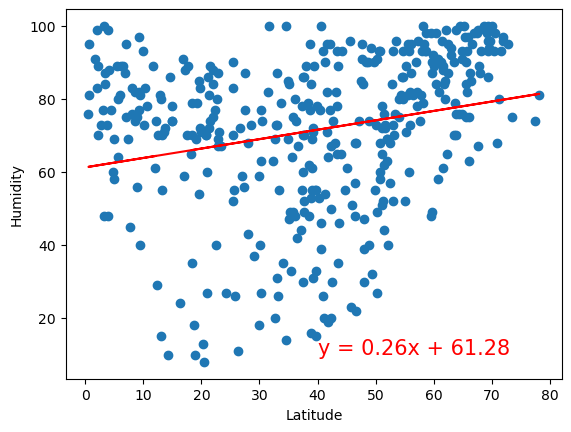

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


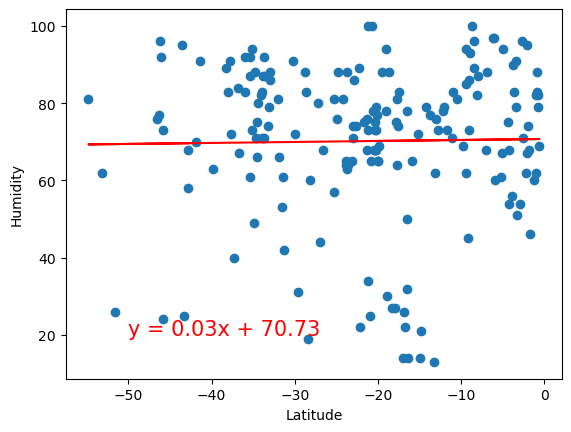

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


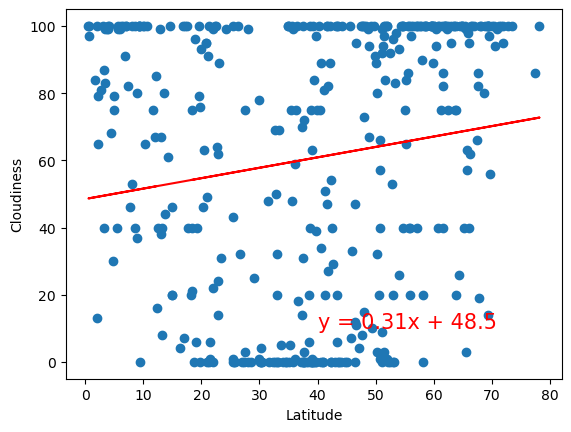

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


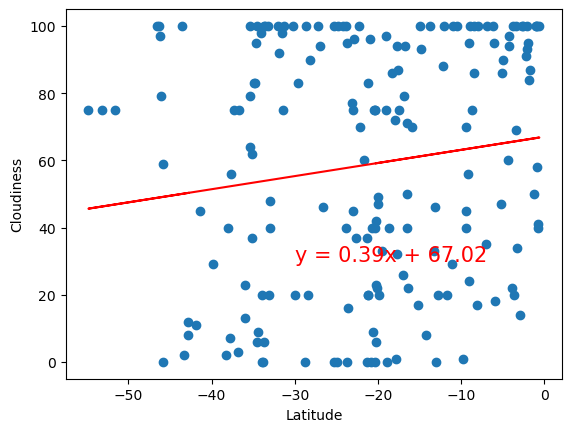

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


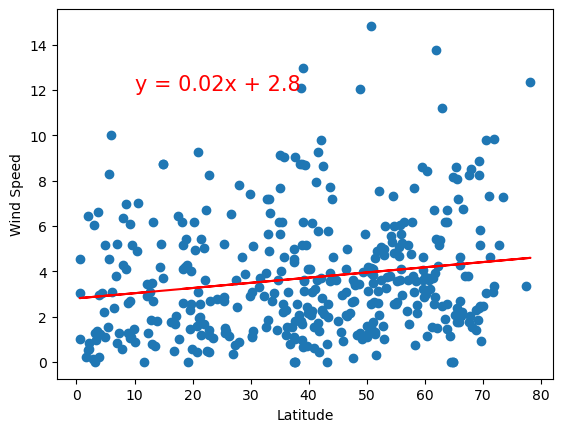

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


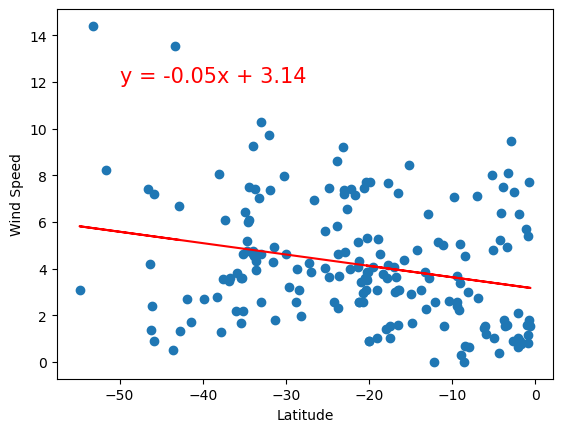

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE